# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.

In [51]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Read the mouse data and the study results
mouse_metadata = pd.read_csv("data/Mouse_metadata.csv")
study_results = pd.read_csv("data/Study_results.csv")

# Combine the data into a single DataFrame
mouse_study = pd.merge(study_results,mouse_metadata,on="Mouse ID",how='left')

mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [52]:
# How many mice are used in the study?
print(mouse_study["Mouse ID"].nunique())

249


In [53]:
# Set Mouse ID and Timepoint as unique ID's
mouse_study = mouse_study.set_index(["Mouse ID", "Timepoint"])

# Check for duplicate indexes, identify mice that have duplicates, using Mouse ID  
mice_duplicates = np.array(mouse_study.index.get_level_values('Mouse ID')[mouse_study.index.duplicated(keep=False)].unique())

print(mice_duplicates)

['g989']


In [54]:
# Identify all the data for the duplicate mouse ID. 
bad_mouse_data = mouse_study[mouse_study.index.get_level_values('Mouse ID').isin(mice_duplicates)]

bad_mouse_data

Tumor Volume (mm3)  Metastatic Sites Drug Regimen     Sex  \
Mouse ID Timepoint                                                              
g989     0                   45.000000                 0     Propriva  Female   
         0                   45.000000                 0     Propriva  Female   
         5                   48.786801                 0     Propriva  Female   
         5                   47.570392                 0     Propriva  Female   
         10                  51.745156                 0     Propriva  Female   
         10                  49.880528                 0     Propriva  Female   
         15                  51.325852                 1     Propriva  Female   
         15                  53.442020                 0     Propriva  Female   
         20                  55.326122                 1     Propriva  Female   
         20                  54.657650                 1     Propriva  Female   
         25                  56.045564                 1     Propriva  Female   
         30                  59.082294                 1     Propriva  Female   
         35                  62.570880                 2     Propriva  Female   

                    Age_months  Weight (g)  
Mouse ID Timepoint                          
g989     0                  21          26  
         0                  21          26  
         5                  21          26  
         5                  21          26  
         10                 21          26  
         10                 21          26  
         15                 21          26  
         15                 21          26  
         20                 21          26  
         20                 21          26  
         25                 21          26  
         30                 21          26  
         35                 21          26

In [55]:
# Create a clean DataFrame by dropping the duplicate mice by Mouse ID.
mouse_study = mouse_study.drop(mouse_study[mouse_study.index.get_level_values('Mouse ID').isin(mice_duplicates)].index)
mouse_study

,,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,Timepoint,,,,,,
b128,0,45.000000,0,Capomulin,Female,9,22
f932,0,45.000000,0,Ketapril,Male,15,29
g107,0,45.000000,0,Ketapril,Female,2,29
a457,0,45.000000,0,Ketapril,Female,11,30
c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...
r944,45,41.581521,2,Capomulin,Male,12,25
u364,45,31.023923,3,Capomulin,Male,18,17
p438,45,61.433892,1,Ceftamin,Female,11,26


In [56]:
# Check number of mice remaining after duplicates purge. 
print(mouse_study.index.get_level_values('Mouse ID').nunique())

248


## Summary Statistics

In [57]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods.

# Group the data by 'Drug Regimen'
regimen_grouped = mouse_study.groupby('Drug Regimen')

# Calculate the mean, median, variance, standard deviation, and SEM for 'Tumor Volume (mm3)'
avg_tumor_volume = regimen_grouped['Tumor Volume (mm3)'].mean()
med_tumor_volume = regimen_grouped['Tumor Volume (mm3)'].median()
var_tumor_volume = regimen_grouped['Tumor Volume (mm3)'].var()
std_tumor_volume = regimen_grouped['Tumor Volume (mm3)'].std()
sem_tumor_volume = regimen_grouped['Tumor Volume (mm3)'].sem()

# generate summary statistics table
tumor_stats = pd.DataFrame({
    'mean': avg_tumor_volume,
    'median': med_tumor_volume,
    'var': var_tumor_volume,
    'std': std_tumor_volume,
    'sem': sem_tumor_volume
})

tumor_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [58]:
# Using the aggregation method, produce the same summary statistics in a single line
mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts


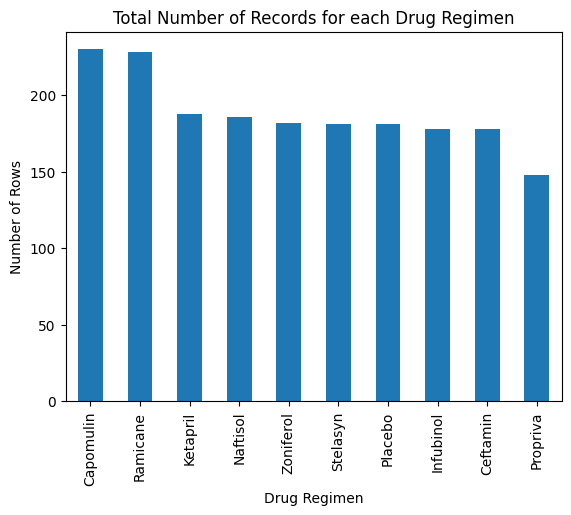

In [59]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen.

# Calculate the total number of rows for each drug regimen
regimen_rowcounts = mouse_study['Drug Regimen'].value_counts()

# Generate a bar plot using pandas only
reg_ct = regimen_rowcounts.plot.bar(
    xlabel = 'Drug Regimen', 
    ylabel = 'Number of Rows', 
    title = 'Total Number of Records for each Drug Regimen'
)

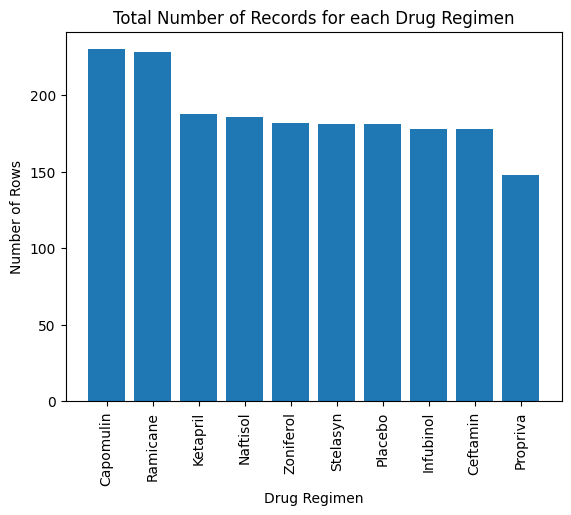

In [60]:
# Generate the same Bar plot using pyplot.
plt.bar(regimen_rowcounts.index, regimen_rowcounts)

# Set the labels
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.title('Total Number of Records for each Drug Regimen')

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

plt.show()

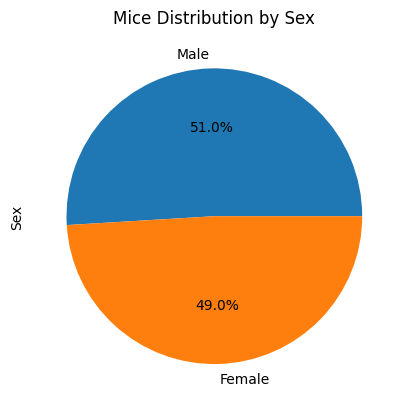

In [61]:
# Generate a pie plot showing the distribution of female versus male mice 
# using Pandas

sex_dist = mouse_study['Sex'].value_counts().plot.pie(autopct='%1.1f%%', ylabel = 'Sex', title = 'Mice Distribution by Sex')

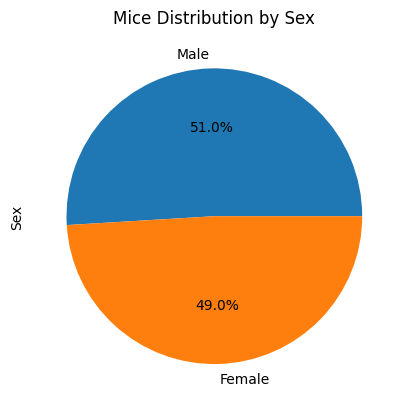

In [62]:
# Generate a pie plot showing the distribution of female versus male mice 
# using pyplot
plt.title('Mice Distribution by Sex')
plt.ylabel('Sex')
sex_dist = plt.pie(mouse_study['Sex'].value_counts(), labels = mouse_study['Sex'].value_counts().index, autopct='%1.1f%%')

## Quartiles, Outliers and Boxplots

In [63]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Reset the index for new dataframe
# Get the last (greatest) timepoint for each mouse
last_timepoint = mouse_study.reset_index().groupby("Mouse ID")["Timepoint"].max()

# Merge this grouped df with the original DataFrame to get the tumor volume at the last timepoint
final_volumes = pd.merge(last_timepoint, mouse_study, on = ["Mouse ID", "Timepoint"])

# Put treatments into a list for for loop (and later for plot labels)
treatments = mouse_study['Drug Regimen'].unique()

# Create empty list to fill with tumor vol data (for plotting)
end_tumor_volume = []